Recommendation system for movies - Emma Munyengango Ihirwe

In [59]:
## The usual pandas and numpy libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

## Abstract Syntax Tree
import ast
ast.literal_eval
from ast import literal_eval

## Natural Language Tokenizer/Programming language
import nltk
from nltk.corpus import stopwords ## import the stopwords

## Sklearn
from sklearn.feature_extraction.text import CountVectorizer ## Transform Text data into Numerical Data
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity


IMPORTING THE DATA

In [2]:
# CAST AND CREW DATASET
credits = pd.read_csv("credits.csv")

# MOVIES DATASET
movies = pd.read_csv("movies_metadata.csv")

# KEYWORDS DATASET
keywords = pd.read_csv("keywords.csv")

/var/folders/gt/mn6qf5dx2sbdygcg_vnxlwpw0000gn/T/ipykernel_93915/3256076784.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("movies_metadata.csv")


MERGING THE DATASETS TOGETHER

In [3]:
# VALUES TO BE DROPPED BECAUSE NOT ID
movies.drop(movies[movies['id'] == '1997-08-20'].index, inplace = True)
movies.drop(movies[movies['id'] == '2012-09-29'].index, inplace = True)
movies.drop(movies[movies['id'] == '2014-01-01'].index, inplace = True)

In [4]:
# MOVIES IDS HAVE TO BE INTEGERS TO BE MERGE WITH THE OTHER DATAFRAMES
movies['id'] = movies['id'].astype(int)

In [5]:
# MERGE MOVIES AND CREDITS DATAFRAMES
df_merged = pd.merge(movies, credits, on='id')

In [6]:
# ADD KEYWORDS TO THE NEW DATAFRAME
df_merged = pd.merge(df_merged, keywords, on='id')

In [7]:
# COMPLETE DATAFRAME
df_merged.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


EDA

In [8]:
df_merged.head(20)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,"[{'cast_id': 1, 'character': 'Linus Larrabee',...","[{'credit_id': '52fe44959251416c75039da9', 'de...","[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam..."
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de...",[]
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,"[{'iso_639_1'

In [9]:
df_merged.shape

(46628, 27)

In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46628 entries, 0 to 46627
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  46628 non-null  object 
 1   belongs_to_collection  4574 non-null   object 
 2   budget                 46628 non-null  object 
 3   genres                 46628 non-null  object 
 4   homepage               8009 non-null   object 
 5   id                     46628 non-null  int64  
 6   imdb_id                46611 non-null  object 
 7   original_language      46617 non-null  object 
 8   original_title         46628 non-null  object 
 9   overview               45633 non-null  object 
 10  popularity             46624 non-null  object 
 11  poster_path            46229 non-null  object 
 12  production_companies   46624 non-null  object 
 13  production_countries   46624 non-null  object 
 14  release_date           46540 non-null  object 
 15  re

In [11]:
df_merged.describe()

,id,revenue,runtime,vote_average,vote_count
count,46628.000000,4.662400e+04,46360.000000,46624.000000,46624.000000
mean,109678.820837,1.102765e+07,94.086885,5.611728,108.169719
std,112908.126984,6.380526e+07,38.454015,1.932157,486.429314
min,2.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,26760.250000,0.000000e+00,85.000000,5.000000,3.000000
50%,61299.000000,0.000000e+00,95.000000,6.000000,10.000000
75%,159624.000000,0.000000e+00,107.000000,6.800000,34.000000
max,469172.000000,2.787965e+09,1256.000000,10.000000,14075.000000


In [12]:
df_merged.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
cast                      object
crew                      object
keywords                  object
dtype: object

In [13]:
# LOOKING AT THE NULL VALUES
df_merged.isna().sum()

adult                        0
belongs_to_collection    42054
budget                       0
genres                       0
homepage                 38619
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   4
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      4
runtime                    268
spoken_languages             4
status                      86
tagline                  25845
title                        4
video                        4
vote_average                 4
vote_count                   4
cast                         0
crew                         0
keywords                     0
dtype: int64

In [14]:
#change type of the column
df_merged['popularity'] = df_merged['popularity'].astype(float)

In [15]:
#change type of the column
df_merged['budget'] = df_merged['budget'].astype(int)

Text(0.5, 1.0, 'Most popular movies')

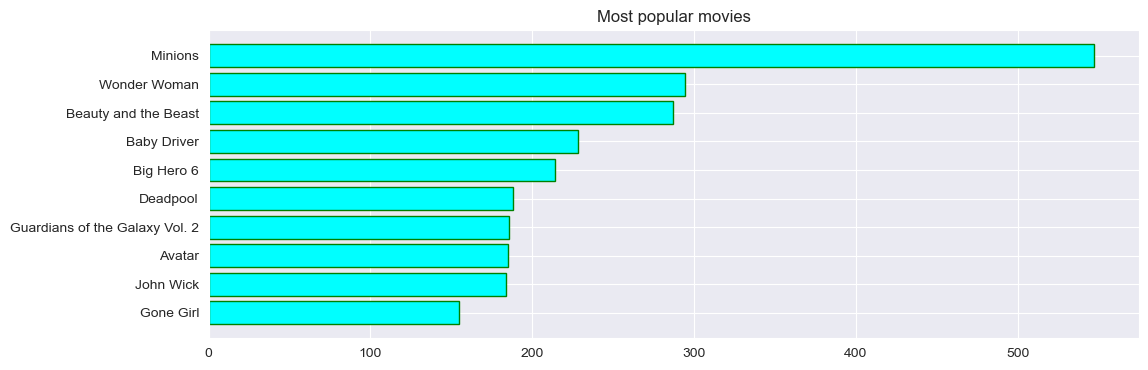

In [16]:
## Most popular movies
pop= df_merged.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
          color='aqua',
          edgecolor='green')
plt.gca().invert_yaxis()
# plt.xlabel("")
plt.title("Most popular movies")

Text(0.5, 1.0, 'Movies with the highest Revenue')

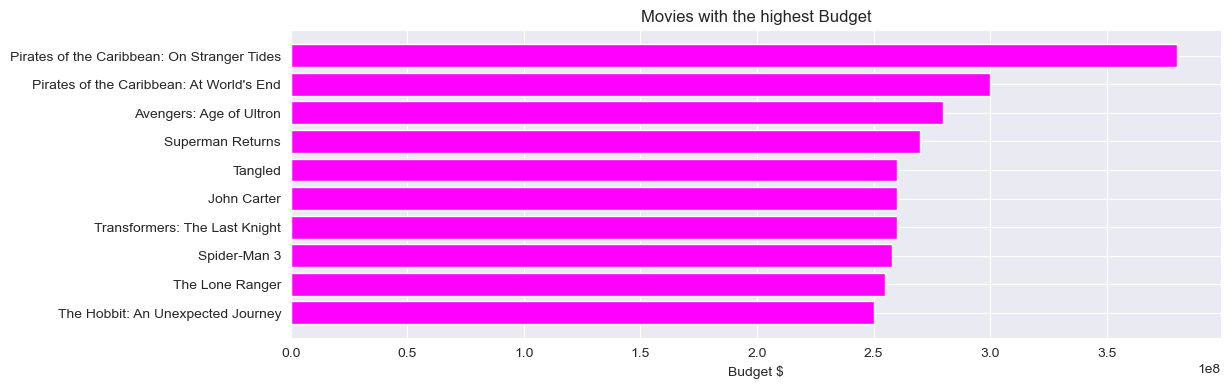

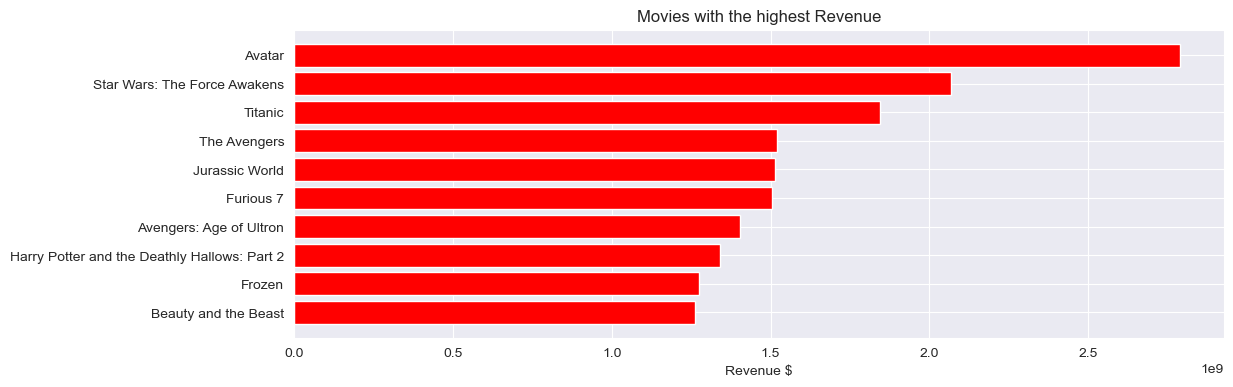

In [17]:
#look at movies budget vs revenue

## Movies with the highest Budget
pop= df_merged.sort_values('budget', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['budget'].head(10), align='center',
         color='fuchsia')
plt.gca().invert_yaxis()
plt.xlabel("Budget $")
plt.title("Movies with the highest Budget")



## Movies with the highest Revenue
pop1= df_merged.sort_values('revenue', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(pop1['title'].head(10),pop1['revenue'].head(10), align='center',
          color='red')
plt.gca().invert_yaxis()
plt.xlabel("Revenue $")
plt.title("Movies with the highest Revenue")

In [18]:
## Number of movies by language beside English

nbr_language = pd.DataFrame(movies['original_language'].value_counts())
nbr_language['language'] = nbr_language.index
nbr_language.columns = ['number', 'language']
nbr_language.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


In [19]:
## replace languages to their full names

nbr_language = nbr_language.replace('fr','French')
nbr_language = nbr_language.replace('it','Italian')
nbr_language = nbr_language.replace('ja','Japanese')
nbr_language = nbr_language.replace('de','German')
nbr_language = nbr_language.replace('es','Spanish')
nbr_language = nbr_language.replace('ru','Russian')
nbr_language = nbr_language.replace('hi','Hindu')

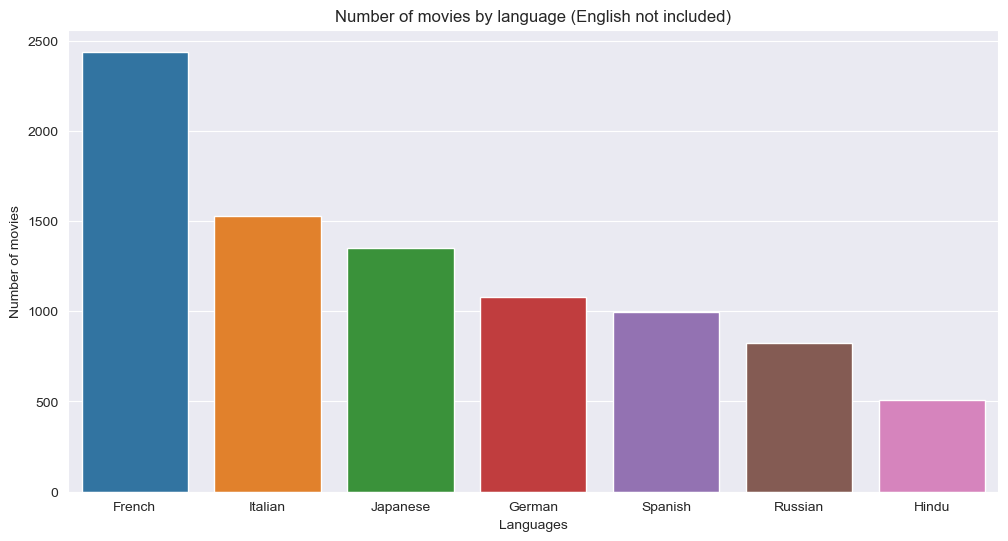

In [20]:
## Number of movies by language beside English

plt.figure(figsize=(12,6))
sns.barplot(x='language', y='number', data=nbr_language.iloc[1:8])
plt.ylabel("Number of movies")
plt.xlabel("Languages")
plt.title("Number of movies by language (English not included)")
plt.show()

CLEANING AND FEATURE ENGINEERING

In [21]:
df = df_merged.copy()

In [22]:
# Remove the columns I don't need
drop = ['adult', 'belongs_to_collection', 'budget', 'homepage', 'imdb_id', 'poster_path', 'production_countries', 'revenue', 'spoken_languages', 'status', 'tagline', 'video', 'vote_average', 'vote_count', 'runtime', 'popularity', 'overview', 'id', 'title' ]
df.drop(columns= df[drop], inplace=True)

In [23]:
df.isna().sum()

genres                   0
original_language       11
original_title           0
production_companies     4
release_date            88
cast                     0
crew                     0
keywords                 0
dtype: int64

In [24]:
# less than 3% of the data
df = df.dropna(subset=['release_date', 'original_language', 'production_companies'])

In [25]:
df

,genres,original_language,original_title,production_companies,release_date,cast,crew,keywords
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'id': 35, 'name': 'Comedy'}]",en,Father of the Bride Part II,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...
46622,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",en,Robin Hood,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...",1991-05-13,"[{'cast_id': 1, 'character': 'Sir Robert Hode'...","[{'credit_id': '52fe44439251416c9100a899', 'de...",[]
46624,"[{'id': 18, 'name': 'Drama'}]",tl,Siglo ng Pagluluwal,"[{'name': 'Sine Olivia', 'id': 19653}]",2011-11-17,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...","[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46625,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,Betrayal,"[{'name': 'American World Pictures', 'id': 6165}]",2003-08-01,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",[]
46626,[],en,Satana likuyushchiy,"[{'name': 'Yermoliev', 'id': 88753}]",1917-10-21,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",[]


In [26]:
df.dtypes

genres                  object
original_language       object
original_title          object
production_companies    object
release_date            object
cast                    object
crew                    object
keywords                object
dtype: object

In [27]:
# convert release date from object to date time
df['release_date'] = pd.to_datetime(df['release_date'])

# extract only the year from the release date
df['release_date'] = df['release_date'].dt.year

In [28]:
#change the type from float to int for the year

df['release_date'] = df['release_date'].astype(int)

In [29]:
# only one movie in 2020

df.drop(df[df['release_date'] == 2020].index, inplace = True)

<AxesSubplot:title={'center':'Number of movies by year'}, xlabel='release_date', ylabel='Number of movies'>

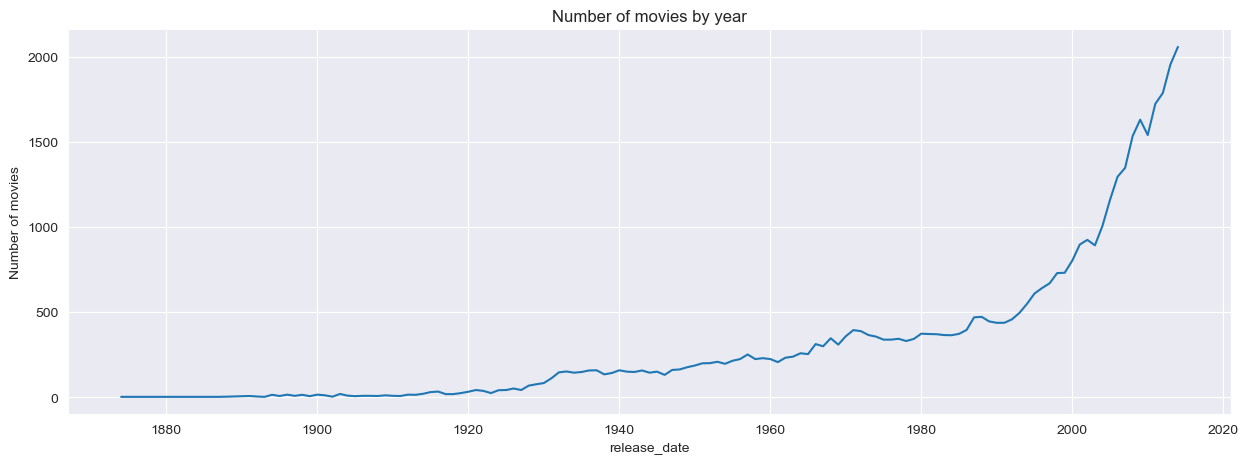

In [30]:
# number of movies by year until 2018

year_count = df.groupby('release_date')['original_title'].count().iloc[:130]

plt.figure(figsize=(15,5))
plt.ylabel("Number of movies")
plt.xlabel("Year")
plt.title("Number of movies by year")
year_count.plot()

In [31]:
## create categories for the years

# OLDEST movies between 1873 and 1979
category1_start = datetime.datetime(1873, 1, 1).date()
category1_end = datetime.datetime(1979, 12, 31).date()
category1_name = 'oldest'

# OLD movies between 1980 and 1999
category2_start = datetime.datetime(1980, 1, 1).date()
category2_end = datetime.datetime(1999, 12, 31).date()
category2_name = 'old'

# NEW movies between 2000 and 2009
category3_start = datetime.datetime(2000, 1, 1).date()
category3_end = datetime.datetime(2009, 12, 31).date()
category3_name = 'new'

# NEWEST movies between 2010 and 2018
category4_start = datetime.datetime(2010, 1, 1).date()
category4_end = datetime.datetime(2018, 12, 31).date()
category4_name = 'newest'

In [32]:
# change release date type from object to date

df_merged['release_date'] = pd.to_datetime(df_merged['release_date'])

In [33]:
# replace years with categories names in initial dataframe

for i in range(len(df_merged)):
    if category1_start.year <= df_merged.loc[i, 'release_date'].year <= category1_end.year:
        df_merged.loc[i, 'release_date'] = category1_name
    elif category2_start.year <= df_merged.loc[i, 'release_date'].year <= category2_end.year:
        df_merged.loc[i, 'release_date'] = category2_name
    elif category3_start.year <= df_merged.loc[i, 'release_date'].year <= category3_end.year:
        df_merged.loc[i, 'release_date'] = category3_name
    elif category4_start.year <= df_merged.loc[i, 'release_date'].year <= category4_end.year:
        df_merged.loc[i, 'release_date'] = category4_name

In [34]:
# add the updated column in the new dataframe

df['type'] = df_merged['release_date']

In [35]:
#  similar amount of movies by categories, satisfied with the split

df['type'].value_counts()

newest    13314
oldest    12009
new       11476
old        9729
Name: type, dtype: int64

In [36]:
# take the genre, production companies, keywords and cast names from their columns


df['genres'] = df['genres'].fillna('np.nan').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df['production_companies'] = df['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df['cast'] = df['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df['keywords'] = df['keywords'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [37]:
# take the director name from crew column

def find_director_name(obj):
    L =[]
    for i in ast.literal_eval(obj):
        if i['job']=="Director":
            L.append(i['name'])
            break
    return L

df['crew'] = df['crew'].apply(find_director_name)

In [38]:
# delete release date column because there is type column now

df.drop(columns='release_date', inplace=True)

In [39]:
df.rename(columns = {'original_title':'title', 'crew':'director', 'cast':'actors'}, inplace = True)

In [40]:
df

,genres,original_language,title,production_companies,actors,director,keywords,type
0,"[Animation, Comedy, Family]",en,Toy Story,[Pixar Animation Studios],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],"[jealousy, toy, boy, friendship, friends, riva...",old
1,"[Adventure, Fantasy, Family]",en,Jumanji,"[TriStar Pictures, Teitler Film, Interscope Co...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],"[board game, disappearance, based on children'...",old
2,"[Romance, Comedy]",en,Grumpier Old Men,"[Warner Bros., Lancaster Gate]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],"[fishing, best friend, duringcreditsstinger, o...",old
3,"[Comedy, Drama, Romance]",en,Waiting to Exhale,[Twentieth Century Fox Film Corporation],"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],"[based on novel, interracial relationship, sin...",old
4,[Comedy],en,Father of the Bride Part II,"[Sandollar Productions, Touchstone Pictures]","[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],"[baby, midlife crisis, confidence, aging, daug...",old
...,...,...,...,...,...,...,...,...
46622,"[Drama, Action, Romance]",en,Robin Hood,"[Westdeutscher Rundfunk (WDR), Working Title F...","[Patrick Bergin, Uma Thurman, David Morrissey,...",[John Irvin],[],old
46624,[Drama],tl,Siglo ng Pagluluwal,[Sine Olivia],"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...",[Lav Diaz],"[artist, play, pinoy]",newest
46625,"[Action, Drama, Thriller]",en,Betrayal,[American World Pictures],"[Erika Eleniak, Adam Baldwin, Julie du Page, J...",[Mark L. Lester],[],new
46626,[],en,Satana likuyushchiy,[Yermoliev],"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",[Yakov Protazanov],[],oldest


In [41]:
# different columns to try and test in the modelling
df.columns

Index(['genres', 'original_language', 'title', 'production_companies',
       'actors', 'director', 'keywords', 'type'],
      dtype='object')

MODELLING

In [42]:
df2 = df.copy()

In [43]:
#lower the letters and attached names in one word (as some actors/directors can have the same first/last name)
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [44]:
# clean the columns selected for the model

df2['genres'] = df2['genres'].apply(clean_data)
df2['actors'] = df2['actors'].apply(clean_data)
df2['director'] = df2['director'].apply(clean_data)
df2['keywords'] = df2['keywords'].apply(clean_data)

In [45]:
# to join all the columns into 1

def soup_with_everything(x):
    return ' '.join(x['actors']) + ' ' + ' '.join(x['director']) + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(
        x['keywords'])

In [46]:
# new column named soup in df2 with the function applied

df2['soup'] = df2.apply(soup_with_everything, axis=1)

In [47]:
# Transform soup column to vectors

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [48]:
# cosine similarity between the vectors

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [49]:
# reverse mapping

df2 = df2.reset_index()
indces = pd.Series(df2.index, index=df2['title'])

In [50]:
#drop duplicate title of movies because it isn't possible to differentiate 2 movies with same title

indces = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [51]:
# function to return recommendations
def recommendation_movies(title, cosine_sim=cosine_sim):
    idc = indces[title]

    sim_score = list(enumerate(cosine_sim[idc]))
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
    sim_score = sim_score[1:11]

    movie_indice = [i[0] for i in sim_score]

    return df2['title'].iloc[movie_indice]

RESULTS

In [52]:
# Kids
recommendation_movies('Toy Story')

3022                                           Toy Story 2
25969                           Toy Story That Time Forgot
15512                                          Toy Story 3
22101                                 Toy Story of Terror!
29164                                      Superstar Goofy
3334                                     Creature Comforts
27971                                        Radiopiratene
29573                                              チェブラーシカ
40840                   VeggieTales: Josh and the Big Wall
40849    VeggieTales: Minnesota Cuke and the Search for...
Name: title, dtype: object

In [53]:
# Comedy / Christmas
recommendation_movies('The Santa Clause')

5717                        The Santa Clause 2
11483    The Santa Clause 3: The Escape Clause
42452                           All She Wishes
43528                            Come Together
28440                  Eloise at Christmastime
16606                Cirque du Soleil: Varekai
30552                   De vliegende Hollander
35634                           Christmas Town
35635                           Christmas Town
14781                                  Lieksa!
Name: title, dtype: object

In [54]:
# French
recommendation_movies('Intouchables')

14781                     Lieksa!
34843           Nos jours heureux
29399                       Samba
2595                Le nain rouge
16140    The Trouble with Dee Dee
28350               Attila Marcel
30868          Elizabeth Ekadashi
41291      Cuisine et dépendances
45570                     Pelmeni
46347                Dom wariatów
Name: title, dtype: object

In [55]:
# Horror
recommendation_movies('Scream')

3180             Scream 3
1653             Scream 2
17137            Scream 4
12094         The Tripper
16165     My Soul to Take
361         New Nightmare
42618             Absurda
15264     Circle of Eight
4573              Shocker
40118    8213: Gacy House
Name: title, dtype: object

In [56]:
# Action
recommendation_movies('The Matrix')

6847                 The Matrix Revolutions
6285                    The Matrix Reloaded
45244                           Kid's Story
44746    Daemonium : Soldado del Inframundo
45510     Recon 2020:  The Caprini Massacre
44952                  The Matrix Revisited
31059                             攻殻機動隊 2.0
6452     Terminator 3: Rise of the Machines
13839                  Terminator Salvation
32777                      Terminal Justice
Name: title, dtype: object

In [57]:
# War
recommendation_movies('Pearl Harbor')

3626                                 Coming Home
43122                          The White Helmets
12356                       The War on Democracy
36078                               Gaston's War
36079                               Gaston's War
13317         Why We Fight: The Battle of Russia
16020                           Killing Kasztner
19075                                     Chosin
24810                                 Level Five
33753    The Life and Times of Rosie the Riveter
Name: title, dtype: object